Esta actividad se centra principalmente en que hagáis los diferentes test de hipotesis de un tema que os interese:

- Hipótesis respecto a un valor.

- Hipótesis respecto dos muestras independientes.

- Hipótesis varias categorías.

- Hipótesis dos muestras relacionadas.

# Energia renovable generada por país en diferentes años

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import ttest
import seaborn as sns

sns.set()

data = pd.read_csv('per-capita-electricity-generation-from-solar-and-wind.csv')
data.head()

,Entity,Code,Year,Solar and wind electricity per capita (kWh)
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


- # Creo que las energias renobables están sobrevaloradas y producen de media menos de 70 kWh.



In [29]:
# data['Solar and wind electricity per capita (kWh)'] = pd.to_numeric(data['Solar and wind electricity per capita (kWh)'], errors='coerce')
hip = data['Solar and wind electricity per capita (kWh)'].mean()

print(hip, 'kWh es el resultado de mi hipotesis')
print('------------------------------------------------------------------------------------------------------')


test_resul1 = ttest(data['Solar and wind electricity per capita (kWh)']
, 70, alternative='greater')
print(test_resul1)

print('------------------------------------------------------------------------------------------------------')

print('El resultado de mi hipotesis, es que estaba equivocado, no se producen 70 kWh de media, si no que se producen ',round(hip,2), 'kWh')
print('Lo sé gracias a que el p-val esta por debajo de los 0.05')


82.69907462000302 kWh es el resultado de mi hipotesis
------------------------------------------------------------------------------------------------------
               T   dof alternative     p-val         CI95%  cohen-d    BF10  \
T-test  3.639567  6996     greater  0.000138  [76.96, inf]  0.04351  20.112   

           power  
T-test  0.976944  
------------------------------------------------------------------------------------------------------
El resultado de mi hipotesis, es que estaba equivocado, no se producen 70 kWh de media, si no que se producen  82.7 kWh
Lo sé gracias a que el p-val esta por debajo de los 0.05


- # ¿Se ha producido de media más energia renovable en España que en Italia?

In [30]:
prod_Spain = data[data['Entity'] =='Spain']['Solar and wind electricity per capita (kWh)']
prod_Italy = data[data['Entity'] =='Italy']['Solar and wind electricity per capita (kWh)']
print(prod_Spain.mean())
print(prod_Italy.mean())

print('------------------------------------------------------------------------------------------------------')

test_resul1 = ttest(prod_Italy, prod_Spain, alternative='greater')
print(test_resul1)

print('------------------------------------------------------------------------------------------------------')

print('El resultado de mi hipotesis, es que estaba en lo correcto, España produce más energia renovable que Italia exactamente: ',prod_Spain.mean() - prod_Italy.mean(),' kWh más que Italia')
print('Lo sé gracias a que el p-val esta por debajo de los 0.05')

405.5824704732758
146.6732363910345
------------------------------------------------------------------------------------------------------
               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -2.953582  114     greater  0.998092  [-404.28, inf]  0.548466  0.054   

           power  
T-test  0.000002  
------------------------------------------------------------------------------------------------------
El resultado de mi hipotesis, es que estaba en lo correcto, España produce más energia renovable que Italia exactamente:  258.9092340822413  kWh más que Italia
Lo sé gracias a que el p-val esta por debajo de los 0.05


- # ¿Hay diferencia de producción entre España, Italia y Francia?, ¿en que país se produce más energía renovable de 2021?


In [31]:
# data_filtrado = data[data['Entity'] != 'World'][['Solar and wind electricity per capita (kWh)','Entity']]

paises = ['Spain','Italy','France']

data_diferencias = data[data['Entity'].isin(paises)]
[['Solar and wind electricity per capita (kWh)','Entity']]


print(data_diferencias.groupby('Entity')['Solar and wind electricity per capita (kWh)'].mean())

anova_resul = pg.anova(data=data_diferencias, dv='Solar and wind electricity per capita (kWh)', between ='Entity')

display(anova_resul)




plt.show()

Entity
France    216.435005
Italy     146.673236
Spain     405.582470
Name: Solar and wind electricity per capita (kWh), dtype: float64


,Source,ddof1,ddof2,F,p-unc,np2
0,Entity,2,146,5.285679,0.006078,0.067518


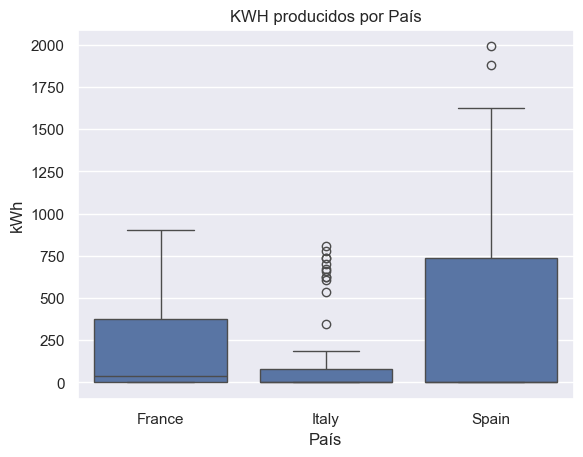

-----------------------------------------------------------------------------------------
Desde este gráfico se puede ver claramente que exiaste una diferencia de producción entre los diferentes países
Y podemos ver que España produce mayor cantidad de energia, y teniendo varios años que sobresale de su media


In [32]:
# print(data_filtrado)

paises = ['Spain','Italy','France']

data_boxplot = data[data['Entity'].isin(paises)]
[['Solar and wind electricity per capita (kWh)','Entity']]

# data_boxplot = data_boxplot.groupby('Entity')['Solar and wind electricity per capita (kWh)'].mean()

sns.boxplot(x='Entity', y='Solar and wind electricity per capita (kWh)', data=data_boxplot)
plt.title('KWH producidos por País')
plt.xlabel('País')
plt.ylabel('kWh')
plt.show()

print('-----------------------------------------------------------------------------------------')
print('Desde este gráfico se puede ver claramente que exiaste una diferencia de producción entre los diferentes países')
print('Y podemos ver que España produce mayor cantidad de energia, y teniendo varios años que sobresale de su media')


- # ¿Se han producido más con las energias renobables en España desde el año 2012 hasta el 2017, o desde el 2018 hasta el 2021?


6366.7892999999995
-----------------------------------------------------------------------------------------
8273.237599999999
-----------------------------------------------------------------------------------------
               T       dof alternative     p-val         CI95%   cohen-d  \
T-test -1.894509  3.272654        less  0.073378  [-inf, 42.8]  1.499111   

         BF10     power  
T-test  2.568  0.682738  
-----------------------------------------------------------------------------------------
El resultado de mi hipotesis, es que España ha producido más energia desde el año 2012 hasta el 2017
Lo sé gracias a que el p-val esta por encima de los 0.05


c:\Users\erikr\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


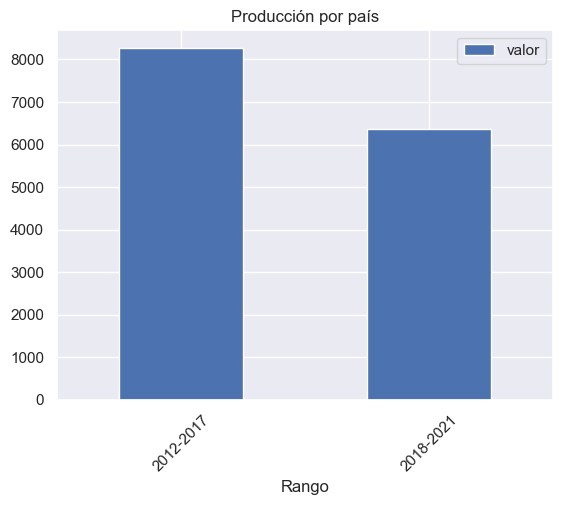

In [38]:
prod_Spain_2021 = data[(data['Entity'] == 'Spain') & (data['Year'] >= 2018) & (data['Year'] <= 2021)]['Solar and wind electricity per capita (kWh)']

prod_Spain_2012 = data[(data['Entity'] == 'Spain') & (data['Year'] >= 2012) & (data['Year'] <= 2017)]['Solar and wind electricity per capita (kWh)']

print(sum(prod_Spain_2021))
print('-----------------------------------------------------------------------------------------')
print(sum(prod_Spain_2012))
print('-----------------------------------------------------------------------------------------')
print(ttest(prod_Spain_2012, prod_Spain_2021, paired=True, alternative='less'))
print('-----------------------------------------------------------------------------------------')


data_rango = {'Rango': ['2012-2017', '2018-2021'],
        'valor': [sum(prod_Spain_2012), sum(prod_Spain_2021)]}
df = pd.DataFrame(data_rango)


df.plot(x='Rango',y='valor', kind='bar',)
plt.title("Producción por país")
plt.xticks(rotation=45)
print('El resultado de mi hipotesis, es que España ha producido más energia desde el año 2012 hasta el 2017')
print('Lo sé gracias a que el p-val esta por encima de los 0.05')
